In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'png'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.marker'] = '^'

In [2]:
# Number of time steps
nt = 12

# Number of testing data
num_data = 2000

# Number of branches
num_branches = 186

# Power flow limit
PF_max = 400
epsilon = 0.5
PF_threshold = PF_max * epsilon

# Matrix to store results
PF_res_true = np.zeros((num_data, num_branches, nt))
PF_res_pred = np.zeros((num_data, num_branches, nt))

In [3]:
# Read PF file
for i in range(num_data):
    # Ground truth
    file_path = f'model_evaluation/PF_true2/true_{i+1}.csv'
    PF_true = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    res = (np.abs(PF_true) >= PF_threshold)
    PF_res_true[i] = res.copy()

    # Prediction
    file_path = f'model_evaluation/PF_pred2/pred_{i+1}.csv'
    PF_pred = pd.read_csv(file_path, header=None, index_col=None).to_numpy()
    res = (np.abs(PF_pred) >= PF_threshold)
    PF_res_pred[i] = res.copy()

PF_res_true = PF_res_true.astype(float)
PF_res_pred = PF_res_pred.astype(float)

In [4]:
np.sum(np.sum(np.sum(PF_res_true))), np.sum(np.sum(np.sum(PF_res_pred)))

(110049.0, 78078.0)

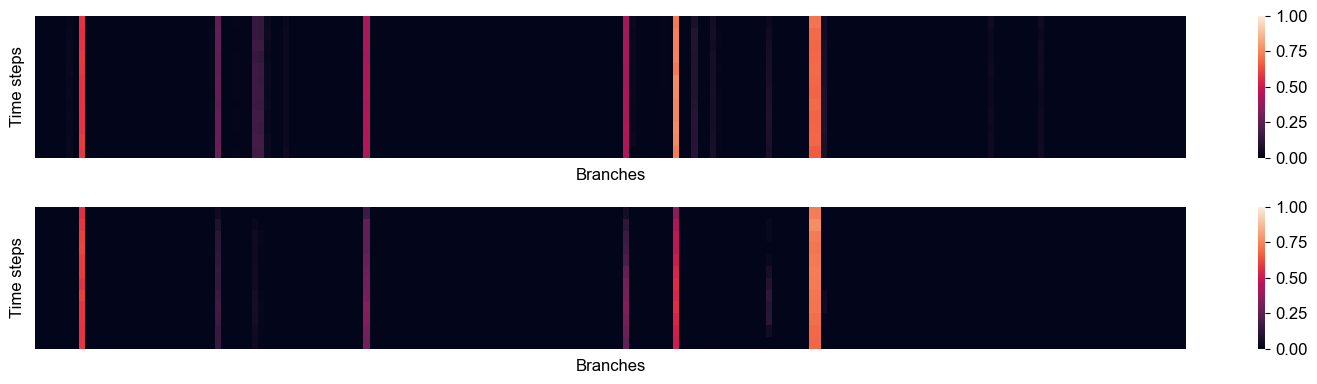

In [5]:
# Probability of heavying loading
prob_true = PF_res_true.mean(axis=0)
prob_pred = PF_res_pred.mean(axis=0)

fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(211)
sns.heatmap(prob_true.T, 
            ax=ax1,
            vmin=0,
            vmax=1,
            xticklabels=[],
            yticklabels=[])
ax1.set_xlabel('Branches')
ax1.set_ylabel('Time steps')

ax2 = fig.add_subplot(212)
sns.heatmap(prob_pred.T, 
            ax=ax2,
            vmin=0,
            vmax=1,
            xticklabels=[],
            yticklabels=[])
ax2.set_xlabel('Branches')
ax2.set_ylabel('Time steps')

plt.tight_layout()
plt.show()
plt.close('all')

##### Select important branches

In [6]:
# Get sorted branch index according to mean probability of ground truth
sorted_idx = np.argsort(prob_true.T.mean(axis=0))

# Select six important branches
num_top_branches = 6
top_branch_idx = sorted_idx[-num_top_branches:]

# Sort top branch index
top_branch_idx = np.sort(top_branch_idx)

top_branch_idx

array([  7,  53,  95, 103, 125, 126])

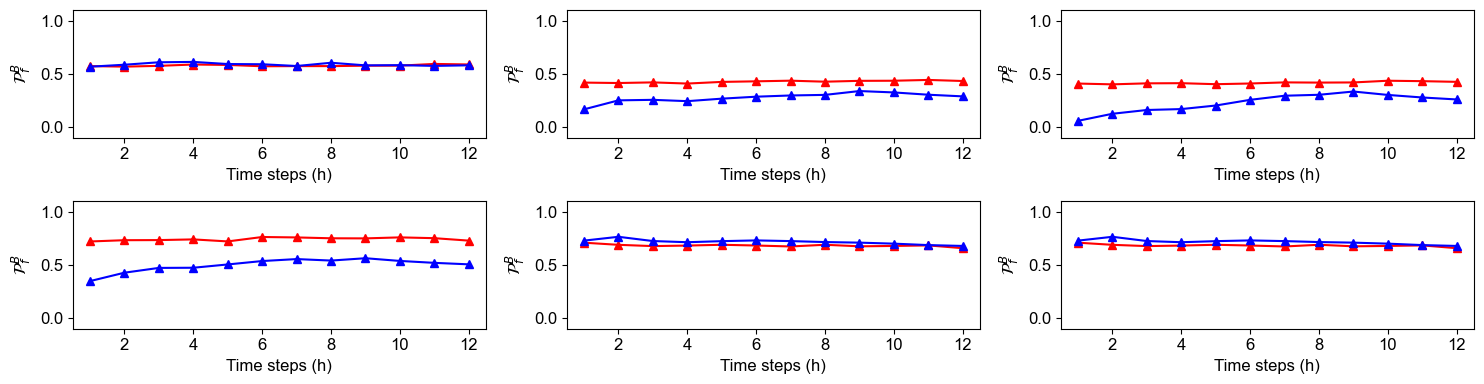

In [7]:
# Plot probability for individual branch
x = np.arange(1, 13)
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(2, 3, 1)
ax1.plot(x, prob_true[top_branch_idx[0], :], color='red')
ax1.plot(x, prob_pred[top_branch_idx[0], :], color='blue')
ax1.set_xlim((0.5, 12.5))
ax1.set_ylim((-0.1, 1.1))
ax1.set_xlabel('Time steps (h)')
ax1.set_ylabel('$\mathcal{P}^B_f$')

ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(x, prob_true[top_branch_idx[1], :], color='red')
ax2.plot(x, prob_pred[top_branch_idx[1], :], color='blue')
ax2.set_xlim((0.5, 12.5))
ax2.set_ylim((-0.1, 1.1))
ax2.set_xlabel('Time steps (h)')
ax2.set_ylabel('$\mathcal{P}^B_f$')

ax3 = fig.add_subplot(2, 3, 3)
ax3.plot(x, prob_true[top_branch_idx[2], :], color='red')
ax3.plot(x, prob_pred[top_branch_idx[2], :], color='blue')
ax3.set_xlim((0.5, 12.5))
ax3.set_ylim((-0.1, 1.1))
ax3.set_xlabel('Time steps (h)')
ax3.set_ylabel('$\mathcal{P}^B_f$')

ax4 = fig.add_subplot(2, 3, 4)
ax4.plot(x, prob_true[top_branch_idx[3], :], color='red')
ax4.plot(x, prob_pred[top_branch_idx[3], :], color='blue')
ax4.set_xlim((0.5, 12.5))
ax4.set_ylim((-0.1, 1.1))
ax4.set_xlabel('Time steps (h)')
ax4.set_ylabel('$\mathcal{P}^B_f$')

ax5 = fig.add_subplot(2, 3, 5)
ax5.plot(x, prob_true[top_branch_idx[4], :], color='red')
ax5.plot(x, prob_pred[top_branch_idx[4], :], color='blue')
ax5.set_xlim((0.5, 12.5))
ax5.set_ylim((-0.1, 1.1))
ax5.set_xlabel('Time steps (h)')
ax5.set_ylabel('$\mathcal{P}^B_f$')

ax6 = fig.add_subplot(2, 3, 6)
ax6.plot(x, prob_true[top_branch_idx[5], :], color='red')
ax6.plot(x, prob_pred[top_branch_idx[5], :], color='blue')
ax6.set_xlim((0.5, 12.5))
ax6.set_ylim((-0.1, 1.1))
ax6.set_xlabel('Time steps (h)')
ax6.set_ylabel('$\mathcal{P}^B_f$')


plt.tight_layout()
plt.show()
plt.close('all')